<a href="https://colab.research.google.com/github/ValdazoAmerico/ways-to-visualize-N-networks/blob/main/Ways_to_visualize_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

In [9]:
url = 'https://raw.githubusercontent.com/Jcharis/common_ml_datasets_explorer_app/master/datasets/iris.csv'

In [10]:
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
#Encode Species
label_dict = {v:k for k, v in enumerate(df['species'].unique())}

In [12]:
label_dict

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [13]:
ylabels = df['species'].map(label_dict)

In [14]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [15]:
#Features & Labels
Xfeatures = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [18]:
#split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(Xfeatures, ylabels, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(100, 4) (50, 4) (100,) (50,)


In [21]:
len(ylabels.unique().tolist())

3

In [29]:
#define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(4,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
#summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 27        
Total params: 165
Trainable params: 165
Non-trainable params: 0
_________________________________________________________________


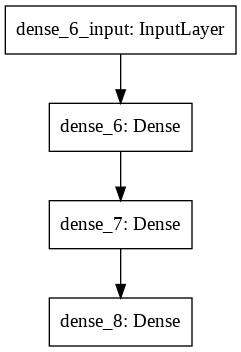

In [31]:
from tensorflow.keras.utils import plot_model
#Visualize
plot_model(model, to_file='iris_model.png', show_shapes=False)

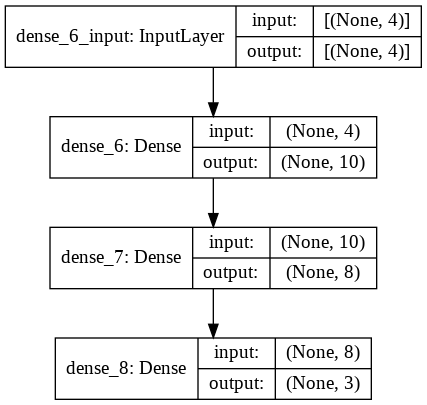

In [32]:
from tensorflow.keras.utils import plot_model
#Visualize with nodes
plot_model(model, to_file='iris_model.png', show_shapes=True)

In [33]:
### Method 2: Ann_Visualizer
!pip install ann-visualizer

  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=bef158ce2c935fbf2f2d89956046b2f4d431370cb482794e4a6b13b66c6a250a
  Stored in directory: /root/.cache/pip/wheels/1b/fc/58/2ab1c3b30350105929308becddda4fb59b1358e54f985e1f4a
Successfully built ann-visualizer


In [35]:
from ann_visualizer.visualize import ann_viz
import graphviz
ann_viz(model, filename='iris_nn_model.gz', title='Iris NN')

In [ ]:
#fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

In [ ]:
loss, acc = model.evaluate(X_test, y_Test, verbose=0)

In [ ]:
acc

In [ ]:
model.save('iris_nn_model.h5')

In [36]:
#Method 3: Tensorboard

In [37]:
pip install tensorboard

In [38]:
%load_ext tensorboard

In [42]:
#Create folder
log_folder = 'logs'
from tensorflow.keras.callbacks import TensorBoard

In [41]:
#Callbacks
callbacks = TensorBoard(log_dir=log_folder, histogram_freq=1)

In [ ]:
# Connect our callbacks to model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0, callbacks=callbacks)

In [ ]:
%tensorboard --logdir={log_folder}